<div align="right" dir="rtl">
    <h3>عنوان پروژه</h3>
    <br>
پر کردن نواقص یک دیتا با پیش بینی آن ها به کمک تحلیل آماری و یک مدل ساده

<br><h3>
توضیح کلی پروژه و تعریف صورت مسئله
    </h3>
    <div alig="right">
       <br>
در این پروژه می خواهیم به کمک کتابخانه های
pandas, numpy, matplotlib 
داده های مورد نظرمان را تحلیل کنیم و نواقصش را رفع و پیش بینی کنیم، ابتدا داده ها را بررسی کرده و به visualization داده ها پرداخته و در ادامه یک مدل ساده یclassification برای پیش بینی به دست می آوریم 
    </div>
</div>

<div align="right">
کتابخانه های مورد نیاز در پروژه را اضافه کرده و سپس داده های مورد نظرمان از فایلی که همراه پروژه قرار گرفته جهت  تحلیل و بررسی داده ها فراخوانی می کنیم و در یک دیتافریم ذخیره می کنیم
    </div>

In [982]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.stats as stats

In [983]:
df = pd.read_csv("bank_term_deposit.csv")

In [984]:
df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,married,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,married,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,single,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,married,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,married,secondary,NaN,yes,no,226.0,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,services,married,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,married,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,married,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,married,secondary,1137.0,no,no,129.0,4,211,other,no


In [985]:
df.describe()

,age,balance,duration,campaign,pdays
count,3984.000000,4164.000000,4388.000000,4521.000000,4521.000000
mean,41.617470,1136.750240,264.724020,2.793630,39.766645
std,10.696378,2726.204918,261.057119,3.109807,100.121124
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000
25%,32.000000,58.000000,104.000000,1.000000,-1.000000
50%,40.000000,316.000000,185.500000,2.000000,-1.000000
75%,49.000000,997.000000,331.000000,3.000000,-1.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000


<div align="right" dir="rtl">
    با استفاده از متد describe خلاصه ای از اطلاعات و جزئیات آماری مربوط به دیتافریم مورد نظرمان را از جمله تعداد، میانگین، انحراف معیار، مینیمم و ماکسیمم و .. به دست می آوریم
    </div>

In [986]:
df.tail()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
4516,33.0,services,married,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,married,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,married,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,married,secondary,1137.0,no,no,129.0,4,211,other,no
4520,44.0,entrepreneur,single,tertiary,1136.0,yes,yes,345.0,2,249,other,no


<div dir="rtl" align="right">
    با استفاده از متد tail می توان چند سطر آخر دیتافریم را سریعا مشاهده کرد 
    </div>

In [987]:
df.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,married,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,married,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,single,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,married,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,married,secondary,NaN,yes,no,226.0,1,-1,unknown,no


<div dir="rtl" align="right">
    با استفاده از متد head می توان چند سطر ابتدایی دیتافریم را سریعا مشاهده کرد 
    </div>

In [988]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   object 
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 424.0+ KB


<div dir="rtl" align="right">
  با استفاده از متد info می توان تایپ مربوط به هر ستون و همچنین تعداد سلول هایی که نال یا خالی نیستند را مشاهده  و بررسی کرد که دیتافریم و ستون ها از چه انواعی هستند و همچنین مموری استفاده شده برای ذخیره دیتافریم را نیز مشاهده می کنیم
    </div>

In [989]:
df = df.replace({'marital': {'married': 0, 'single': 1, 'divorced': 2}})
df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,0.0,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,0.0,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,1.0,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,0.0,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,0.0,secondary,NaN,yes,no,226.0,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,services,0.0,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,0.0,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,0.0,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,0.0,secondary,1137.0,no,no,129.0,4,211,other,no


<div dir="rtl" align="right">
مقادیر ستون دسته ای marital را به بازه ی [0:2] نگاشت و جایگزین می کنیم
    </div>

In [990]:
df.age.isna().sum()

537

In [991]:
df.job.isna().sum()

0

In [992]:
df.marital.isna().sum()

120

In [993]:
df.education.isna().sum()

0

In [994]:
df.balance.isna().sum()

357

In [995]:
df.housing.isna().sum()

219

In [996]:
df.loan.isna().sum()

0

In [997]:
df.duration.isna().sum()

133

In [998]:
df.campaign.isna().sum()

0

In [999]:
df.pdays.isna().sum()

0

In [1000]:
df.poutcome.isna().sum()

0

In [1001]:
df.y.isna().sum()

434

<div dir="rtl" align="right">
    برای هر ستون با استفاده از تابع isna و sum تعداد سطرهایی که مقدار آن ستون برای آن ها خالی است را نشان دادیم
    </div>

In [1002]:
df2 = df.loc[df['y'].isna()]

In [1003]:
df = df.drop(df.loc[df['y'].isna()].index)

<div dir="rtl" align="right">
در این قسمت سطرهایی که ستون هدف آن ها نال و خالی است را جدا کرده و در یک دیتافریم جدید به نام df2 ذخیره می کنیم
    </div>

In [1004]:
mean_age = df['age'].mean(skipna = True)
mean_age

41.62409972299169

In [1005]:
df.age = df.age.fillna(mean_age)

In [1006]:
mean_marital = df['marital'].mean(skipna = True)
mean_marital

0.49560411956794775

In [1007]:
df.marital = df.marital.fillna(mean_marital)

In [1008]:
mean_balance = df['balance'].mean(skipna = True)
mean_balance

1119.537991498406

In [1009]:
df.balance = df.balance.fillna(mean_balance)

In [1010]:
mean_duration = df['duration'].mean(skipna = True)
mean_duration

266.0868580060423

In [1011]:
df.duration = df.duration.fillna(mean_duration)

<div dir="rtl" align="right">
مزایا: ساده و آسان و سریع محاسبه می شود
معایب: اگر مقدار بسیار بزرگ یا بسیار کوچکی در مقادیر وجود داشته باشد، این مقدار تأثیر می گذارد  که باعث می شود میانگین غیرقابل استفاده باشد.
گاهی ضرایب را بیش از حد تخمین می زنند، گاهی ضرایب را دست کم می گیرند
    </div>

In [1012]:
df["loan"].value_counts()["yes"]

621

In [1013]:
df["loan"].value_counts()["no"]

3466

<div dir="rtl" align="right">
۶۲۱ نفر وام خانه دارند و ۳۴۶۶ نفر وام خانه ندارند
  </div>

In [1014]:
df['y'].value_counts()['yes']

464

In [1015]:
df['y'].value_counts()['no']

3623

<div dir="rtl" align="right">
۴۶۴ نفر سپرده بلند مدت ثبت کرده اند و ۳۶۲۳ نفر سپرده بلند مدت ثبت نکرده اند
</div>

In [1016]:
df_q5 = df.loc[(df['age'] > 35) & (df['marital'] == 1) & (df['poutcome'] == 'success')]
df_q5

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
200,41.6241,technician,1.0,tertiary,992.000000,yes,no,301.000000,1,88,success,no
233,45.0000,blue-collar,1.0,secondary,1119.537991,yes,no,768.000000,2,91,success,no
397,37.0000,technician,1.0,tertiary,611.000000,no,no,60.000000,5,87,success,no
540,47.0000,admin.,1.0,secondary,3696.000000,no,no,250.000000,2,181,success,yes
1173,41.6241,technician,1.0,secondary,2729.000000,yes,no,945.000000,1,139,success,no
2188,46.0000,admin.,1.0,secondary,1693.000000,yes,no,137.000000,1,97,success,no
2372,43.0000,services,1.0,secondary,343.000000,yes,no,266.086858,2,97,success,yes
2917,41.0000,technician,1.0,tertiary,1646.000000,yes,no,261.000000,1,184,success,yes
3385,38.0000,unknown,1.0,tertiary,1119.537991,no,no,260.000000,3,95,success,yes
3593,42.0000,blue-collar,1.0,primary,1628.000000,yes,no,119.000000,1,195,success,no


In [1017]:
df_q5.count()

age          14
job          14
marital      14
education    14
balance      14
housing      14
loan         14
duration     14
campaign     14
pdays        14
poutcome     14
y            14
dtype: int64

<div dir="rtl" align="right">
    ‬ ‫14 نفر بالای ۳۵ سال مجرد وجود دارد که نتیجه کمپین بازاریابی قبلی آن ها موفقیت آمیز بوده است‬
 </div>

In [1018]:
df.loc[(df['education'] == 'secondary')].balance

1       4789.000000
4       1119.537991
7        147.000000
10      9374.000000
11       264.000000
           ...     
4514     125.000000
4515     473.000000
4516    -333.000000
4518     295.000000
4519    1137.000000
Name: balance, Length: 2081, dtype: float64

<div dir="rtl" align="right">
در دیتافریم بالا میانگین موجودی حساب سالانه مشتریانی که وضعیت تحصیلی scondary دارند را مشاهده می کنیم
</div>

In [1019]:
start = time.time()
df.loc[(df['education'] == 'secondary')].balance
end = time.time()

In [1020]:
end - start

0.011754035949707031

In [1021]:
start = time.time()
for i in range(len(df)):
    if(df.iloc[i, 3] == 'secondary'):
        print(df.iloc[i, 4])
end = time.time()

4789.0
1119.537991498406
147.0
9374.0
264.0
52.0
36.0
473.0
132.0
16.0
93.0
784.0
15.0
4189.0
171.0
42.0
1811.0
289.0
1117.0
228.0
5.0
364.0
82.0
11.0
784.0
415.0
1355.0
16873.0
338.0
444.0
1119.537991498406
344.0
174.0
591.0
219.0
451.0
177.0
657.0
879.0
424.0
-195.0
2843.0
1119.537991498406
5996.0
524.0
427.0
2488.0
217.0
22.0
331.0
55.0
188.0
4111.0
2693.0
-231.0
119.0
586.0
228.0
428.0
323.0
1152.0
179.0
814.0
51.0
38.0
62.0
273.0
5.0
1641.0
459.0
978.0
214.0
499.0
1269.0
1143.0
298.0
462.0
131.0
-465.0
5181.0
176.0
1119.537991498406
6979.0
6.0
-62.0
21.0
-126.0
215.0
9216.0
39.0
5563.0
3771.0
1526.0
23.0
1599.0
-196.0
1333.0
9149.0
-35.0
11494.0
141.0
975.0
4.0
43.0
46.0
-24.0
359.0
142.0
33.0
1119.537991498406
396.0
2.0
3576.0
1.0
-247.0
66.0
-189.0
1119.537991498406
1119.537991498406
989.0
16.0
29.0
1119.537991498406
1516.0
872.0
92.0
17.0
1119.537991498406
174.0
12186.0
524.0
4.0
1148.0
3561.0
63.0
26.0
16.0
-22.0
48.0
4994.0
1119.537991498406
593.0
759.0
345.0
1287.0
25.0
687.

1119.537991498406
-559.0
526.0
954.0
429.0
462.0
1119.537991498406
266.0
198.0
14363.0
1119.537991498406
136.0
27.0
31.0
1119.537991498406
89.0
1119.537991498406
1119.537991498406
68.0
-149.0
2411.0
362.0
179.0
76.0
189.0
6.0
2749.0
35.0
-65.0
2416.0
35.0
-674.0
319.0
1545.0
-762.0
181.0
122.0
2469.0
1119.537991498406
719.0
-14.0
-118.0
216.0
842.0
1119.537991498406
1119.537991498406
51.0
396.0
1119.537991498406
293.0
474.0
16178.0
38.0
1164.0
-435.0
389.0
2718.0
757.0
-422.0
248.0
598.0
184.0
-229.0
182.0
41.0
4194.0
153.0
78.0
-28.0
268.0
2223.0
312.0
1119.537991498406
691.0
192.0
84.0
3337.0
1347.0
64.0
249.0
1119.537991498406
128.0
196.0
5533.0
38.0
235.0
3.0
67.0
422.0
2322.0
167.0
558.0
-23.0
494.0
239.0
179.0
4539.0
77.0
-673.0
1119.537991498406
253.0
1738.0
199.0
-97.0
781.0
119.0
2967.0
-331.0
318.0
1119.537991498406
152.0
14.0
475.0
1119.537991498406
3285.0
1119.537991498406
413.0
-247.0
25.0
14.0
1119.537991498406
878.0
3975.0
4.0
7495.0
137.0
24.0
345.0
311.0
139.0
47.0
-11

In [1022]:
end - start

0.5814085006713867

<div dir="rtl" align="right">
زمان در vectorization کمتر از حالت حلقه مصرف میشود چون در حالت vectorization چند عملیات به صورت موازی انجام میشه اما در حالت حلقه به صورت متوالی است
time of vectorization: 0.011754035949707031
<br>time of loop: 0.5814085006713867
</div>


<AxesSubplot:>

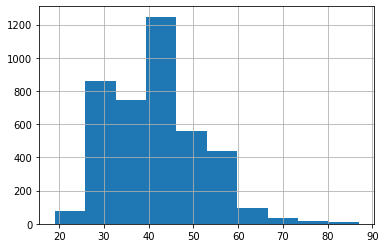

In [1023]:
df.age.hist()

<AxesSubplot:>

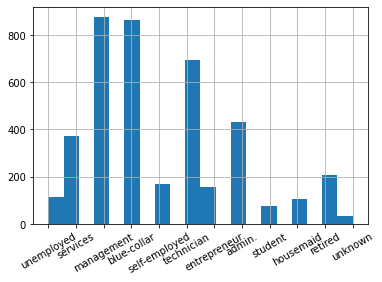

In [1024]:
df.job.hist(xlabelsize = 10, xrot = 30, bins = 20)

<AxesSubplot:>

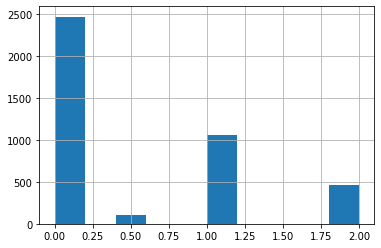

In [1025]:
df.marital.hist()

<AxesSubplot:>

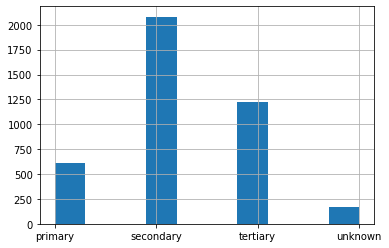

In [1026]:
df.education.hist()

<AxesSubplot:>

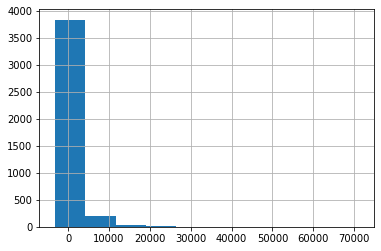

In [1027]:
df.balance.hist()

<AxesSubplot:>

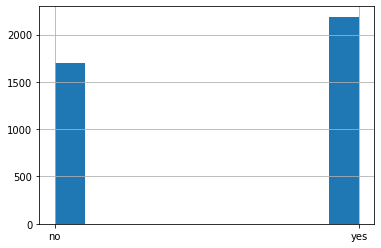

In [1028]:
df.housing.hist()

<AxesSubplot:>

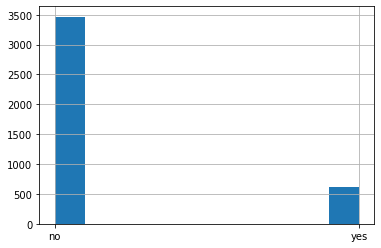

In [1029]:
df.loan.hist()

<AxesSubplot:>

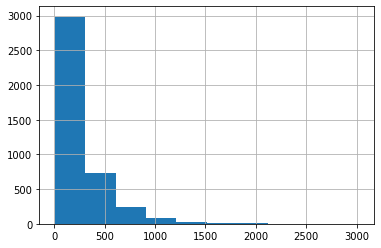

In [1030]:
df.duration.hist()

<AxesSubplot:>

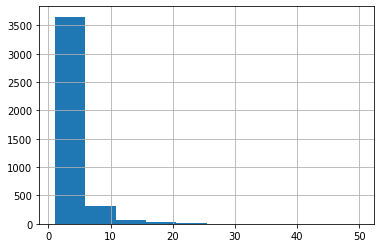

In [1031]:
df.campaign.hist()

<AxesSubplot:>

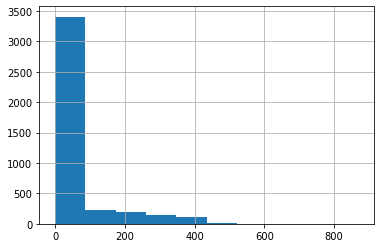

In [1032]:
df.pdays.hist()

<AxesSubplot:>

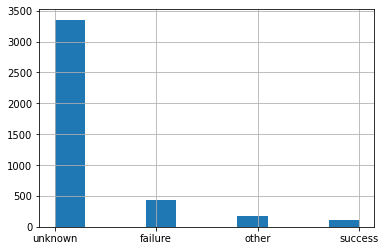

In [1033]:
df.poutcome.hist()

<AxesSubplot:>

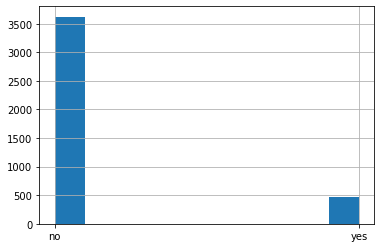

In [1034]:
df.y.hist()

<div dir="rtl" align="right">
    به کمک نمودار هیستو میتوانیم فراوانی اعضا را برای هر ستون نشان دهیم برای هر ستون این نمودار را رسم می کنیم
</div>

In [1035]:
df = df.drop("job", axis=1)
df = df.drop("marital", axis=1)
df = df.drop("education", axis=1)
df = df.drop("housing", axis=1)
df = df.drop("loan", axis=1)
df = df.drop("poutcome", axis=1)

In [1036]:
df

,age,balance,duration,campaign,pdays,y
0,30.0000,1787.000000,79.000000,1,-1,no
1,33.0000,4789.000000,266.086858,1,339,no
2,41.6241,135.000000,185.000000,1,330,no
3,30.0000,1476.000000,199.000000,4,-1,no
4,59.0000,1119.537991,226.000000,1,-1,no
...,...,...,...,...,...,...
4516,33.0000,-333.000000,329.000000,5,-1,no
4517,57.0000,-3313.000000,153.000000,1,-1,no
4518,57.0000,295.000000,151.000000,11,-1,no
4519,28.0000,1137.000000,129.000000,4,211,no


ستون های غیرعددی را دراپ میکنیم چون با ستون های عددی کار داریم

In [1037]:
df3 = df

In [1038]:
df3['age'] = (df3['age'] - df3['age'].mean()) / df3['age'].std()

In [1039]:
df3['balance'] = (df3['balance'] - df3['balance'].mean()) / df3['balance'].std()

In [1040]:
df3['duration'] = (df3['duration'] - df3['duration'].mean()) / df3['duration'].std()

In [1041]:
df3['campaign'] = (df3['campaign'] - df3['campaign'].mean()) / df3['campaign'].std()

In [1042]:
df3['pdays'] = (df3['pdays'] - df3['pdays'].mean()) / df3['pdays'].std()

<div dir="rtl" align="right">
با استفاده از کم کردن میانگین و تقسیم بر انحراف معیار دیتافریم را نرمالایز میکنیم
</div>

In [1043]:
df

,age,balance,duration,campaign,pdays,y
0,-1.154443,0.255910,-7.247688e-01,-0.573012,-0.404051,no
1,-0.856499,1.406898,2.202097e-16,-0.573012,3.031432,no
2,0.000000,-0.377479,-3.141280e-01,-0.573012,2.940492,no
3,-1.154443,0.136670,-2.598925e-01,0.380660,-0.404051,no
4,1.725681,0.000000,-1.552953e-01,-0.573012,-0.404051,no
...,...,...,...,...,...,...
4516,-0.856499,-0.556913,2.437236e-01,0.698550,-0.404051,no
4517,1.527052,-1.699467,-4.380951e-01,-0.573012,-0.404051,no
4518,1.527052,-0.316134,-4.458430e-01,2.605894,-0.404051,no
4519,-1.353073,0.006695,-5.310703e-01,0.380660,1.738074,no


In [1044]:
df_yes = df.loc[(df['y'] == 'yes')]

In [1045]:
df_no = df.loc[(df['y'] == 'no')]

<div dir="rtl" align="right">
دیتافریم کاربری که سپرده مدت دار را ثبت کرده از دیتافریم کاربری که سپرده مدت را ثبت نکرده جدا کرده و هر یک را در دیتا فریم جدا ذخیره میکنیم
</div>

In [1046]:
mean_age_yes = df_yes.age.mean()
mean_age_no = df_no.age.mean()
std_age_yes = df_yes.age.std()
std_age_no = df_no.age.std()

In [1047]:
mean_balance_yes = df_yes.balance.mean()
mean_balance_no = df_no.balance.mean()
std_balance_yes = df_yes.balance.std()
std_balance_no = df_no.balance.std()

In [1048]:
mean_duration_yes = df_yes.duration.mean()
mean_duration_no = df_no.duration.mean()
std_duration_yes = df_yes.duration.std()
std_duration_no = df_no.duration.std()

In [1049]:
mean_campaign_yes = df_yes.campaign.mean()
mean_campaign_no = df_no.campaign.mean()
std_campaign_yes = df_yes.campaign.std()
std_campaign_no = df_no.campaign.std()

In [1050]:
mean_pdays_yes = df_yes.pdays.mean()
mean_pdays_no = df_no.pdays.mean()
std_pdays_yes = df_yes.pdays.std()
std_pdays_no = df_no.pdays.std()

انحراف معیار و میانگین را برای هر کدام حساب کرده و ذخیره میکنیم

Text(0, 0.5, 'prob')

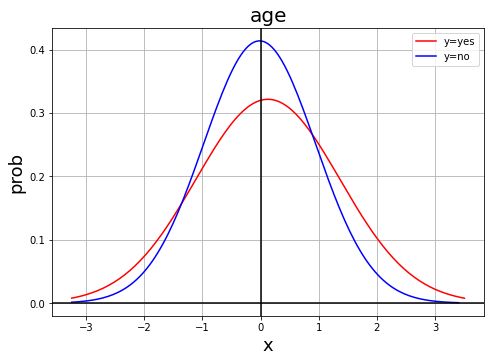

In [1051]:
x = np.linspace(min(df_yes["age"] - 1), max(df_yes["age"] - 1), 150)
x2 = np.linspace(min(df_no["age"] - 1), max(df_no["age"]  - 1), 150)
fig = plt.figure()
ax = fig.add_axes([0, 0 , 1, 1])
ax.plot(x, stats.norm.pdf(x, mean_age_yes, std_age_yes), label = 'y=yes', color = 'r')
ax.plot(x2, stats.norm.pdf(x2, mean_age_no, std_age_no), label = 'y=no', color = 'b')
ax.grid(True, which = 'both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.legend()
ax.set_title("age", fontsize = 20)
ax.set_xlabel("x", fontsize = 18)
ax.set_ylabel("prob", fontsize = 18)

Text(0, 0.5, 'prob')

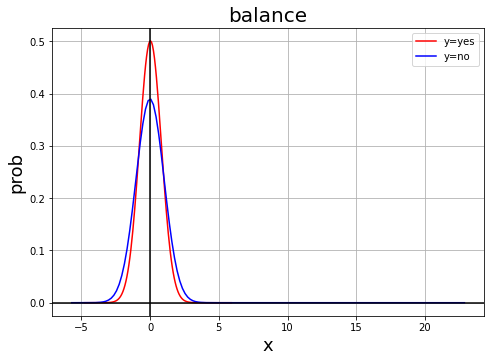

In [1052]:
x = np.linspace(min(df_yes["balance"] - 4), max(df_yes["balance"] - 4), 150)
x2 = np.linspace(min(df_no["balance"] - 4), max(df_no["balance"] - 4), 150)
fig = plt.figure()
ax = fig.add_axes([0, 0 , 1, 1])
ax.plot(x, stats.norm.pdf(x, mean_balance_yes, std_balance_yes), label = 'y=yes', color = 'r')
ax.plot(x2, stats.norm.pdf(x2, mean_balance_no, std_balance_no), label = 'y=no', color = 'b')
ax.grid(True, which = 'both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.legend()
ax.set_title("balance", fontsize = 20)
ax.set_xlabel("x", fontsize = 18)
ax.set_ylabel("prob", fontsize = 18)

Text(0, 0.5, 'prob')

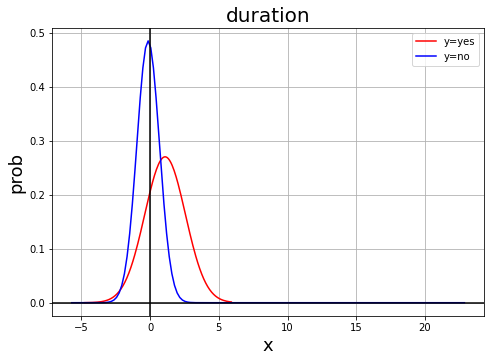

In [1053]:
x = np.linspace(min(df_yes["balance"] - 4), max(df_yes["balance"] - 4), 150)
x2 = np.linspace(min(df_no["balance"] - 4), max(df_no["balance"] - 4), 150)
fig = plt.figure()
ax = fig.add_axes([0, 0 , 1, 1])
ax.plot(x, stats.norm.pdf(x, mean_duration_yes, std_duration_yes), label = 'y=yes', color = 'r')
ax.plot(x2, stats.norm.pdf(x2, mean_duration_no, std_duration_no), label = 'y=no', color = 'b')
ax.grid(True, which = 'both')
ax.legend()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title("duration", fontsize = 20)
ax.set_xlabel("x", fontsize = 18)
ax.set_ylabel("prob", fontsize = 18)

Text(0, 0.5, 'prob')

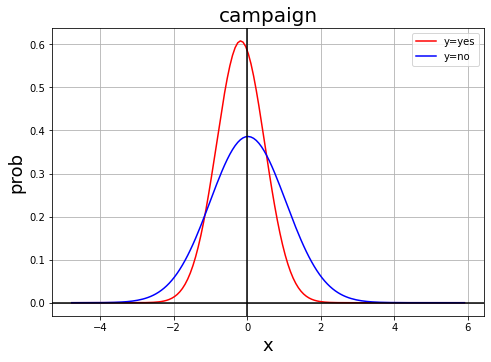

In [1054]:
x = np.linspace(min(df_yes["balance"] - 4), max(df_yes["balance"] - 4), 150)
x2 = np.linspace(min(df_no["balance"] - 4), max(df_no["balance"] - 4), 150)
fig = plt.figure()
ax = fig.add_axes([0, 0 , 1, 1])
ax.plot(x, stats.norm.pdf(x, mean_campaign_yes, std_campaign_yes), label = 'y=yes', color = 'r')
ax.plot(x, stats.norm.pdf(x, mean_campaign_no, std_campaign_no), label = 'y=no', color = 'b')
ax.legend()
ax.grid(True, which = 'both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title("campaign", fontsize = 20)
ax.set_xlabel("x", fontsize = 18)
ax.set_ylabel("prob", fontsize = 18)

Text(0, 0.5, 'prob')

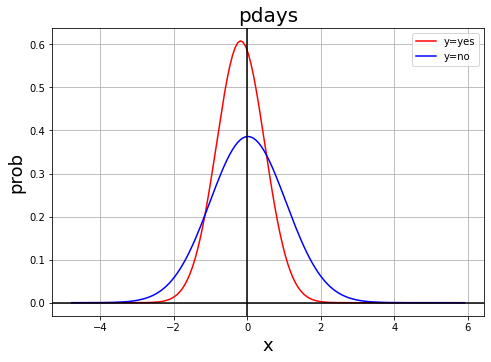

In [1055]:
x = np.linspace(min(df_yes["balance"] - 4), max(df_yes["balance"] - 4), 150)
x2 = np.linspace(min(df_no["balance"] - 4), max(df_no["balance"] - 4), 150)
fig = plt.figure()
ax = fig.add_axes([0, 0 , 1, 1])
ax.plot(x, stats.norm.pdf(x, mean_campaign_yes, std_campaign_yes), color = 'r', label = 'y=yes')
ax.plot(x, stats.norm.pdf(x, mean_campaign_no, std_campaign_no), label = 'y=no', color = 'b')
ax.legend()
ax.grid(True, which = 'both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title("pdays", fontsize = 20)
ax.set_xlabel("x", fontsize = 18)
ax.set_ylabel("prob", fontsize = 18)

<div dir="rtl" align="right">
تابع چگالی احتمال توزیع آن فیچر را به ازای هر دو حالت به دست می آوریم و نمودارش را رسم میکنیم
    </div>

In [1066]:
mean_duration_yes
mean_duration_no
std_duration_yes
std_duration_no

a = 1 / (2 * std_duration_yes ** 2) - 1 / ( 2 * std_duration_no ** 2)
b = mean_duration_no / (std_duration_no **2) - mean_duration_yes / (std_duration_yes**2)
c = mean_duration_yes ** 2 /(2*std_duration_yes ** 2) - mean_duration_no ** 2 / (2 * std_duration_no ** 2) - np.log(std_duration_no / std_duration_yes)
intersection = np.roots([a,b,c])

In [1067]:
intersection

array([-2.15749285,  0.76809877])

In [1059]:
df2 = df2.drop("education", axis=1)
df2 = df2.drop("housing", axis=1)
df2 = df2.drop("job", axis=1)
df2 = df2.drop("loan", axis=1)
df2 = df2.drop("poutcome", axis=1)


In [1068]:
df2

,age,marital,balance,duration,campaign,pdays,y
34,49.0,0.0,1235.0,354.0,3,-1,yes
38,33.0,0.0,3935.0,765.0,1,342,yes
54,NaN,0.0,2231.0,272.0,3,-1,yes
65,51.0,2.0,23.0,134.0,1,170,yes
89,NaN,0.0,1831.0,203.0,2,-1,yes
...,...,...,...,...,...,...,...
4470,31.0,1.0,1166.0,207.0,1,-1,yes
4471,59.0,0.0,3534.0,216.0,4,-1,yes
4473,33.0,0.0,479.0,137.0,1,272,yes
4477,32.0,1.0,577.0,101.0,2,-1,yes


In [1073]:
df2['y'] = 'no'

In [1074]:
df2.loc[((df2['duration'] < intersections[0]) | (df2['duration'] > intersections[1]), 'y')] = 'yes'
df2.to_csv('result.csv')
df2

,age,marital,balance,duration,campaign,pdays,y
34,49.0,0.0,1235.0,354.0,3,-1,yes
38,33.0,0.0,3935.0,765.0,1,342,yes
54,NaN,0.0,2231.0,272.0,3,-1,yes
65,51.0,2.0,23.0,134.0,1,170,yes
89,NaN,0.0,1831.0,203.0,2,-1,yes
...,...,...,...,...,...,...,...
4470,31.0,1.0,1166.0,207.0,1,-1,yes
4471,59.0,0.0,3534.0,216.0,4,-1,yes
4473,33.0,0.0,479.0,137.0,1,272,yes
4477,32.0,1.0,577.0,101.0,2,-1,yes


<div dir="rtl" align="right">
برای هر نمودار تقاطع میان هر دو حالت را به دست آورده و بعد برای ستون هدف مدت زمان تلفن آن ها اگر میان دو تقاطع باشد no می شود در غیر این صورت yes ثبت میکنیم
    </div>